In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, AvgPool2D, Flatten
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
mnist=mnist.load_data()
len(mnist)

2

In [ ]:
mnist[0][0].shape

(60000, 28, 28)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
mnist[0][1].shape

(60000,)

In [ ]:
mnist[1][0].shape

(10000, 28, 28)

In [ ]:
mnist[1][1].shape

(10000,)

In [ ]:
mnist[1][1][0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
mnist[0][0][7].shape

(28, 28)

In [ ]:
# plt.imshow(x_train[7],cmap="gray")
# print(y_train[7])

In [ ]:
# y_test1=y_test
#Convert the labels into one-hot codes.
# num_classes = 10
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# print(y_train[7])

In [ ]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [ ]:
model=keras.Sequential() #Create a network sequence.
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu'))
#model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu',input_shape = (28,28,1)))
model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu'))
model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=16,kernel_size = 3,strides = (1,1),padding = 'same',activation = 'relu'))
model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))


model.add(Flatten())
model.add(Dense(84,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 6)         906       
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 6)          0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          880       
                                                                 
 average_pooling2d_2 (Averag  (None, 3, 3, 16)         0

In [ ]:
# model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 49s 102ms/step - loss: 0.6019 - accuracy: 0.8221 - val_loss: 0.2185 - val_accuracy: 0.9329
Epoch 2/10
469/469 [==============================] - 46s 98ms/step - loss: 0.1937 - accuracy: 0.9413 - val_loss: 0.1449 - val_accuracy: 0.9545
Epoch 3/10
469/469 [==============================] - 47s 101ms/step - loss: 0.1422 - accuracy: 0.9574 - val_loss: 0.1204 - val_accuracy: 0.9638
Epoch 4/10
469/469 [==============================] - 46s 98ms/step - loss: 0.1171 - accuracy: 0.9645 - val_loss: 0.1003 - val_accuracy: 0.9680
Epoch 5/10
469/469 [==============================] - 47s 100ms/step - loss: 0.1033 - accuracy: 0.9686 - val_loss: 0.0917 - val_accuracy: 0.9707
Epoch 6/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0928 - accuracy: 0.9718 - val_loss: 0.0802 - val_accuracy: 0.9760
Epoch 7/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0837 - accuracy: 0.9737 - val_loss: 0.0760 - val_accur

In [ ]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 3s 11ms/step - loss: 0.0515 - accuracy: 0.9835


[0.05150480195879936, 0.9835000038146973]

In [ ]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 3s 10ms/step


(10000, 10)

In [ ]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

[1.3262965e-15 5.6428685e-11 9.9999994e-01 3.4674081e-09 3.1617696e-20
 6.1909527e-16 8.0624267e-24 4.7919207e-10 5.9149244e-12 3.9712902e-19]
2


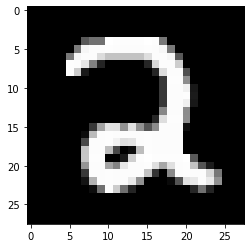

In [ ]:
plt.imshow(x_test[503],cmap="gray")
print(y_pred[503])
print(y_pred1[503])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred1,y_test))
print(accuracy_score(y_pred1,y_test))

# print(confusion_matrix(y_pred1,y_test1))
# print(accuracy_score(y_pred1,y_test1))


[[ 974    0    1    0    0    1    3    1    3    1]
 [   0 1128    0    0    0    1    4    2    0    5]
 [   0    2 1026    3    2    0    0   10    4    0]
 [   0    1    0  995    0   10    1    3    7    2]
 [   0    0    0    0  964    0    1    1    0    7]
 [   0    0    0    2    0  872    3    0    4    6]
 [   0    1    0    0    4    1  944    0    2    1]
 [   1    0    2    5    3    1    0 1003    3    3]
 [   4    2    3    3    1    3    2    2  948    3]
 [   1    1    0    2    8    3    0    6    3  981]]
0.9835


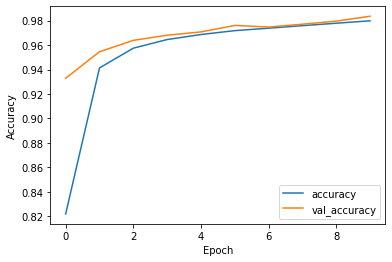

In [ ]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')